<span style='color:Blue'>Guitar tuner</span>
=======

The aim of this project is to make a basic guitar tuner.
Guitar tuners use live spectrograms to tell the musician whether their instrument is tuned at the correct frequencies.
this program allows to detect the pitch of the played guitar according to an audio recording.

# <span style='color:Red'>1 - Import libraries and audios</span>

Used libraries:
[librosa](https://librosa.org/doc/latest/index.html), [numpy](https://numpy.org/), [ipython](https://ipython.org/), [scipy](https://www.scipy.org/), [pandas](https://pandas.pydata.org/), [matplotlib](https://matplotlib.org/)

In [1]:
%matplotlib inline
import librosa
from IPython.display import Audio
import scipy
from scipy.fftpack import fft
import matplotlib.pyplot as plt
import pandas as pd 
import librosa.display
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams.update({'font.size': 12})

In [2]:
file_path = ["audios/string_1.wav", "audios/string_2.wav", "audios/string_3.wav"] 
samples = []
sampling_rate = [] 

for i in range(3):
    samples_temp , sampling_rate_temp = librosa.load(file_path[i], sr=None, mono = True, 
                                                  offset = 0.0, duration = None)
    samples.append(samples_temp)
    sampling_rate.append(sampling_rate_temp)
for i in range(3):
    print("Audio",i,[len(samples[i]),sampling_rate[i]])

Audio 0 [237568, 44100]
Audio 1 [117912, 22050]
Audio 2 [124344, 22050]


Exemple:
This audio 1 was recorded(sampled) with a sampling frequency of 44,1 kHz. In other words, while recording this file they were capturing 44100 amplitudes every second. Thus, If we want to know the duration of the audio, we can simply divide the number of samples (amplitudes) by the sampling-rate as shown below :

In [3]:
duration_of_sound = [ len(samples[i])/sampling_rate[i] for i in range(3) ]
duration_of_sound

[5.38702947845805, 5.3474829931972785, 5.639183673469388]

In [4]:
print("Audio 1")
Audio(file_path[0])

Audio 1


In [5]:
print("Audio 2")
Audio(file_path[1])

Audio 2


In [6]:
print("Audio 3")
Audio(file_path[2])

Audio 3


# <span style='color:Red'>2 - Visualizing Audio </span>

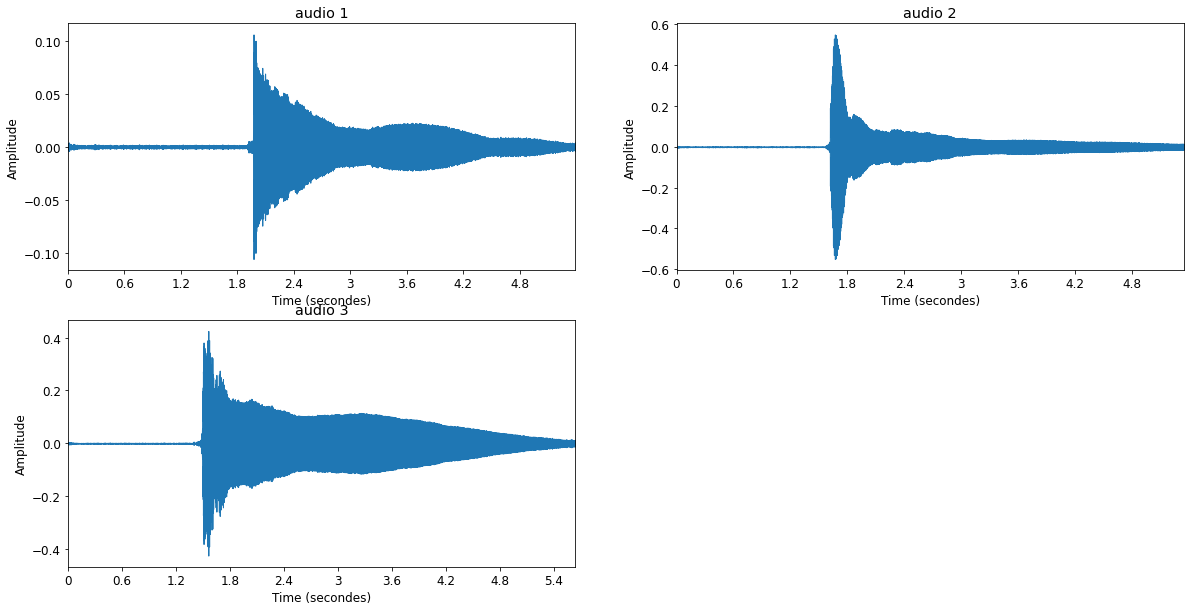

In [7]:
for i in range(3):
    plt.subplot(2, 2, i+1)
    
    librosa.display.waveplot(y = samples[i], sr = sampling_rate[i]) 
    plt.xlabel("Time (secondes)")
    plt.ylabel("Amplitude")
    plt.title("audio %i" %(i+1)) 
plt.show()

This shows us the loudness (amplitude) of sound wave changing with time.To better understand the audio signal, it is necessary to transform it into the frequency-domain.

# <span style='color:Red'>3  - Fast Fourier Transform (FFT)</span>

Fast Fourier Transformation(FFT) is a mathematical algorithm that calculates Discrete Fourier Transform(DFT) of a given sequence. The only difference between FT(Fourier Transform) and FFT is that FT considers a continuous signal while FFT takes a discrete signal as input. 

In [8]:
#list of notes
#with their frequencies (in Hz)
notesList = [['E1', '329.63','0.15'], 
            ['B2', '246.94','0.15'], 
            ['G3', '196.00','0.15'], 
            ['D4', '146.83','0.08'], 
            ['A5', '110.00','0.08'], 
            ['E6', ' 82.41','0.04']]

In [9]:
#Convert the list of notes to pandas dataframe
df = pd.DataFrame(notesList)
df.columns = ['Note', 'Freq','Accuracy']
df['Freq']=df['Freq'].astype(float)
df['Accuracy']=df['Accuracy'].astype(float)
#df.info()
#df.dtypes
minFr,maxFr=df['Freq'].min(),df['Freq'].max()

In [10]:
df

,Note,Freq,Accuracy
0,E1,329.63,0.15
1,B2,246.94,0.15
2,G3,196.00,0.15
3,D4,146.83,0.08
4,A5,110.00,0.08
5,E6,82.41,0.04


The frequencies above are for the standard tuning method of playing guitar. The lowest string on the guitar oscillates at about 82 Hz, and the highest string on the guitar oscillates at about 330 Hz. This means that when we take the Fast Fourier Transform of the guitar, we expect to see six large peaks when the guitar is strummed without any fingering.

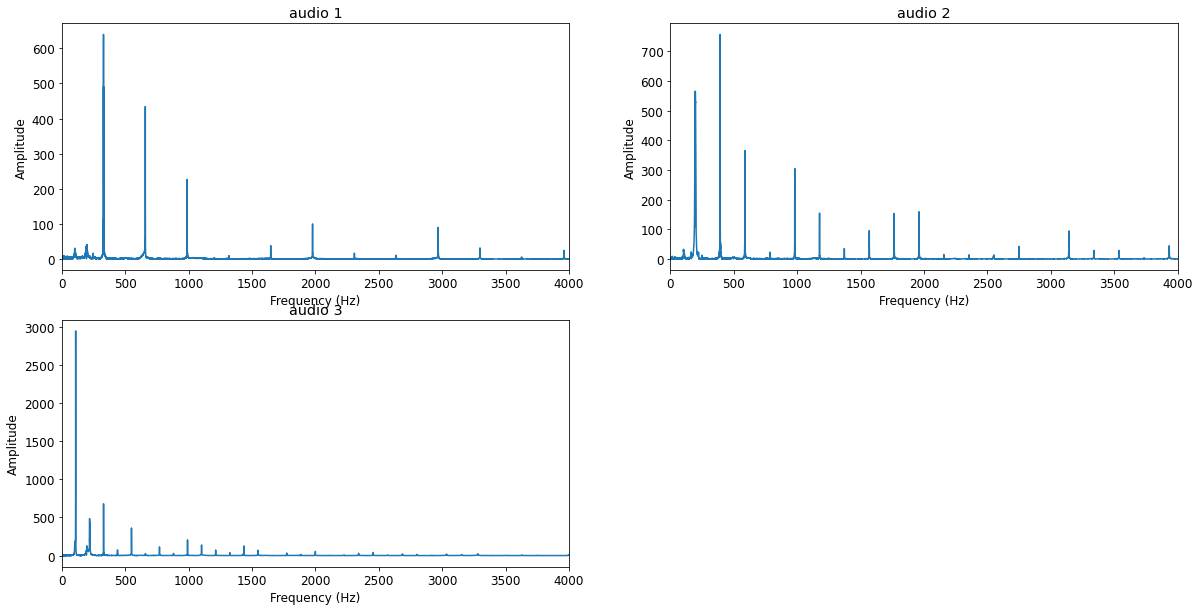

In [11]:

import numpy as np
from matplotlib import pyplot as plt
MaxFFT = []
maxfreqs = []
for i in range(3):
    plt.subplot(2, 2, i+1)
    FFT = abs(scipy.fft.fft(samples[i]))
    freqs = scipy.fftpack.fftfreq(len(FFT), (1.0/sampling_rate[i]))
    plt.plot(freqs[range(len(FFT)//2)], FFT[range(len(FFT)//2)])
    
    MaxFFT.append(max(FFT))
    maxposition = np.where(FFT == max(FFT))
    maxfreqs.append(freqs[maxposition])
    plt.xlim(0, 4000)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.title("audio %i" %(i+1))
plt.show()

By going into the frequency domain, we can clearly observe that our three audios present a series of peaks at different frequencies. As expected there is a strong intensity at the first frequencie and there are other significant peaks at integer multiples of this frequencie.\
The fundamental pitch is produced by the whole string vibrating back and forth. But the string is also vibrating in halves, thirds, quarters, fifths, and so on, producing harmonics. 

### Plot cleaning

In this part we clean the plot to be more representative. The frequency corresponding to the maximum magnitude is detected.

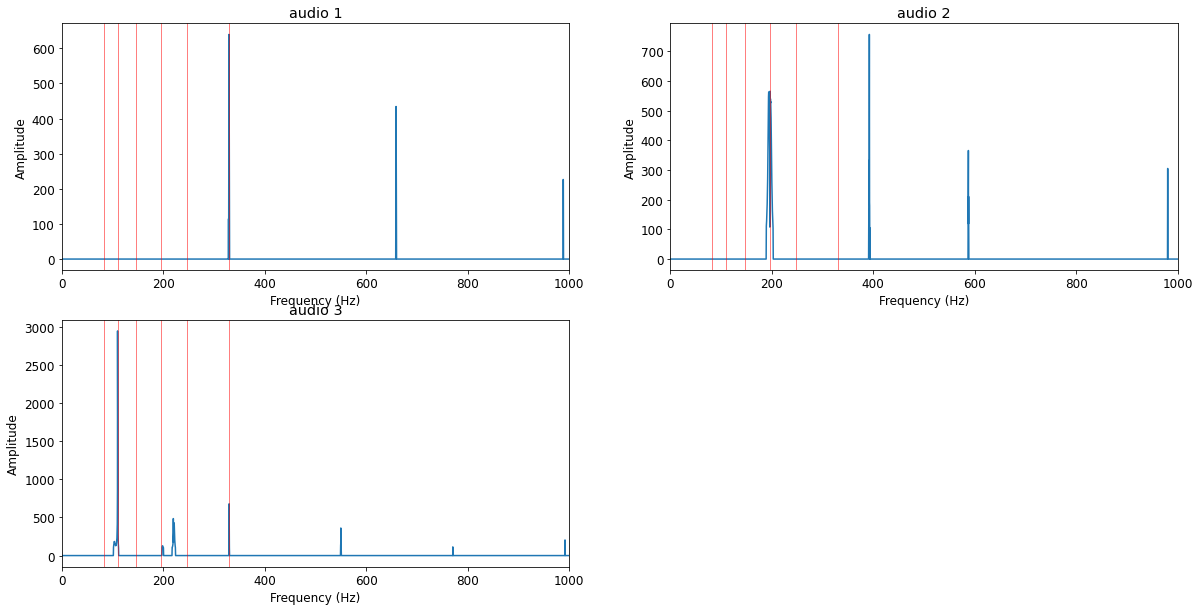

In [12]:
MaxFFT = [] 
maxfreqs = []
Sum_MaxFFT_temp = 0
Sum_MaxFFT = 0
for i in range(3):
    plt.subplot(2, 2, i+1)
    FFT = abs(scipy.fft.fft(samples[i]))
    freqs = scipy.fftpack.fftfreq(len(FFT), (1.0/sampling_rate[i]))
    
    FFT_temp = FFT 
    # reduce the frequencies with an amplitude lower than 100 to 0
    FFT_temp = np.where(FFT_temp <= 100, 0, FFT_temp) 
    plt.plot(freqs[range(len(FFT)//2)], FFT_temp[range(len(FFT)//2)])
    
    for j in range(3):
        # find the frequency corresponding to the maximum amplitude 
        MaxFFT_temp = max(FFT_temp)
        Maxposition_temp = np.where(FFT == max(FFT_temp))
        

        # find the frequency corresponding to the maximum sum of amplitude in range of 100 Hz around MaxFFT_temp 
        for x in range(Maxposition_temp[0][0] - 50, Maxposition_temp[0][0] + 50):
            Sum_MaxFFT_temp = Sum_MaxFFT_temp + FFT_temp[x]
            
        if (Sum_MaxFFT_temp>Sum_MaxFFT):
                Sum_MaxFFT = Sum_MaxFFT_temp
                Maxposition = Maxposition_temp
                #print (MaxFFT_temp)
                FFT_temp = np.where(FFT_temp == MaxFFT_temp, 0, FFT_temp)  

    
    MaxFFT.append(FFT[Maxposition])
    maxfreqs.append(freqs[Maxposition])
    plt.xlim(0, 1000)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.title("audio %i" %(i+1))
    #ploting the Notes
    for s in df['Freq']:
        plt.axvline(x=s, color='r', linewidth=0.5, linestyle="-")
plt.show()

The spectrum reveals some interesting secrets which we couldn't see in the time domain.we can notice that there is a correspondence between peaks and some of the guitar note.

In [13]:
print('Audio 1:')
print("The frequency",maxfreqs[0][0],"Hz corresponds to the maximum amplitude ")
print('Audio 2:')
print("The frequency",maxfreqs[1][0],"Hz corresponds to the maximum amplitude ")
print('Audio 3:')
print("The frequency",maxfreqs[2][0],"Hz corresponds to the maximum amplitude ")

Audio 1:
The frequency 330.0520272090517 Hz corresponds to the maximum amplitude 
Audio 2:
The frequency 196.54106452269488 Hz corresponds to the maximum amplitude 
Audio 3:
The frequency 110.47698320787492 Hz corresponds to the maximum amplitude 


# <span style='color:Red'>4-Note Recognition</span>

The methodology used here to determine the played note, is to find the frequency corresponding to the maximum sum of amplitude in range of 100 Hz around local maximum

In [14]:
note = []
C = []
for i in range(3):
    print("audio",i)
    for j in range(len(df['Freq'])):
        if(maxfreqs[i][0] >= (df['Freq'][j]-5) and maxfreqs[i][0] <= (df['Freq'][j]+5)):
            note.append(df['Note'][j])
            #source https://en.wikipedia.org/wiki/Cent_(music)
            C.append(1200*np.log2(maxfreqs[i][0]/df['Freq'][j]))
            print(note[i])
            print(C[i],'cent')

audio 0
E1
2.215091342442991 cent
audio 1
G3
4.772544848449081 cent
audio 2
A5
7.490767032420887 cent


To conclude, we could detect the note played in each audio, but it turns out that accuracy is higher than 1 cent. the cause of this may be that the guitar is not tuned and needs to be tuned or due to background noise